# INF8775 – Analyse et conception d’algorithmes
# TP1 – Hiver 2021

Thiboutot, Thomas, 2143877

Barri, Alfa Umar, 1952357

Note finale :

 <u>**Date limite de remise :**</u>  21 Février 23h59 (Groupe B1), 13 février 23h59 (Groupe B2)

# Instructions

## Rédaction et remise du rapport

- Ce notebook constitue à la fois le sujet du TP, votre code et votre rapport. Il contient déjà du code pour faciliter vos mesures et l'affichage de vos résultats, ainsi qu'un squelette pour votre rapport.

- Complétez directement le notebook, vous êtes libres de créer de nouvelles cellules de code ou de texte.

- Les questions et tâches à effectuées sont généralement indiquées par un TODO, mais lisez attentivement car nous pourrions avoir oublié d'en indiquer certaines.

- Des questions sont réutilisées d'un algorithme à l'autre (puisque l'on reproduit les expérimentations à des fins de comparaisons). Veillez à suffisament développer les premières réponses afin de l'on comprenne bien votre raisonnement et pour montrer votre bonne compréhension. Vous pourrez être plus concis par la suite.

- Remettez le fichier du notebook sur Moodle avec le nom `NOM1_MATRICULE1_NOM2_MATRICULE2.ipynb`

- Vous pouvez inclure du code trouvé sur Internet, mais vous devez en mentionner la source, sous peine d'être sanctionnés pour plagiat.

## Mise en situation

Ce travail pratique se répartit sur deux séances de laboratoire et porte sur l’analyse empirique et hybride des algorithmes. Dans les capsules vidéo de la semaine 3, trois approches d’analyse de l’implantation d’un algorithme sont décrites. Vous les mettrez en pratique pour des algorithmes de résolution d’un problème connu.


## Description du problème

On vous demande de résoudre le problème de la ligne d’horizon (The Skyline Problem) qui consiste à dessiner la silhouette de bâtiments lorsqu’ils sont vus de loin. Ces bâtiments sont juxtaposés l’un à l’autre et il est possible que l’un en cache un autre.

Chaque bâtiment est défini par le triplet `(l, r, h)` avec `h` la hauteur du bâtiment et `l` et `r` les abscisses des murs gauche et droit, respectivement.

La solution représente une suite de couples `(x, h)` représentant les coordonnées des points définissant la silhouette des bâtiments.

Soit l’exemple suivant avec 5 bâtiments :

- L'exemplaire est : `(2, 9, 10), (3, 7, 15), (5, 12, 12), (15, 20, 10),
(19, 24, 8)`
- La solution est : `(2, 10), (3, 15), (7, 12), (12, 0), (15, 10), (20, 8), (24, 0)`

La figure B représente la silhouette (et donc la solution) tracée par les bâtiments colorés de la figure A.

In [1]:
# Problem data
example_buildings = [(2, 9, 10), (3, 7, 15), (5, 12, 12), (15, 20, 10), (19, 24, 8)]

# Solution data
example_skyline = [(2, 10), (3, 15), (7, 12), (12, 0), (15, 10), (20, 8), (24, 0)]

Axes(0.547727,0.11;0.352273x0.77)


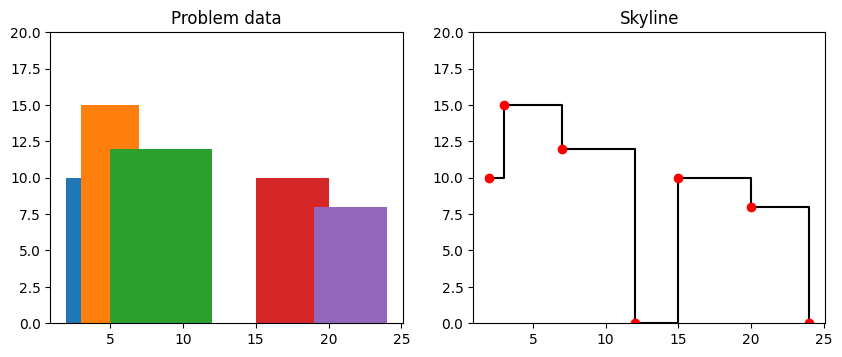

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots with equal width
fig, axs = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 1]})
print(axs[1])

# Create the first subplot to show the problem data as colored filled rectangles
for building in example_buildings:
 left, right, height = building
 axs[0].fill([left, right, right, left], [0, 0, height, height])

axs[0].set_ylim([0, 20])
axs[0].set_aspect('equal')
axs[0].set_title('Problem data')

# Create the second subplot to plot the skyline as a staircase function
x = [x for x, _ in example_skyline]
y = [y for _, y in example_skyline]
axs[1].step(x, y, where='post', color='black')

# Add the solution points as red dots
axs[1].plot(x, y, 'ro')

axs[1].set_ylim([0, 20])
axs[1].set_aspect('equal')
axs[1].set_title('Skyline')

plt.show()


## Algorithmes à implanter

On vous demande de résoudre ce problème de 3 façons différentes :

1. En utilisant un algorithme force brute simple ;
2. En utilisant un algorithme diviser pour régner ;
3. En utilisant un algorithme diviser pour régner avec seuil de récursivité non élémentaire.

Pour l’algorithme 3, vous devrez déterminer un seuil de récursivité expérimentalement. Les exemplaires dont la taille est en deçà de ce seuil ne sont plus résolus récursivement mais plutôt directement avec l’algorithme 1.

Vos algorithmes doivent donner des réponses où les couples `(x, h)` sont triés de façon non décroissante selon x (cf. exemple plus haut). Par ailleurs, ils ne doivent pas donner de solutions avec couples redondants, i.e. deux couples qui se suivent ne peuvent pas avoir la même hauteur ni la même abscisse.


## Jeu de données

La fonction `generate_sample` ci-dessous permet de générer un exemplaire d'une taille donnée.

La fonction `get_dataset` permet de récupérer un dataset pour la liste de taille fournie. Elle prend également en entrée un graine aléatoire pour générer le dataset en question.

Afin que chaque groupe travaille avec un set différent, mais que vos propres expériences soient reproductibles, entrez l'un de vous matricule comme graine aléatoire dans la cellule ci-dessous.

Vous êtes bien entendu libres de tester et mesurer vos algorithme sur le même dataset qu'un autre groupe. Pour cela, générez simplement un dataset avec la même graine et la même liste de taille.



In [3]:
import random

max_width = 50
max_dist = 30
max_height = 300

def generate_sample(size):
    sample = []
    last_l = 0
    for _ in range(size):
        l = random.randint(last_l, last_l + max_dist)
        r = random.randint(l+1, l + max_width)
        h = random.randint(1, max_height)
        sample.append((l, r, h))
        last_l = l
    return sample

def get_dataset(seed, sizes):
    random.seed(seed)
    return { size: [generate_sample(size) for _ in range(5)]
        for size in sizes }

# Implantations et expérimentations

Ces fonctions auxiliaires vous sont fournies pour vérifier l'exactitude des vos algorithmes, mesurer leurs performance et afficher vos résultats.

Il est recommandé de prendre le temps de lire et comprendre le code.

Exécutez la cellule ci-dessous pour pouvoir utiliser les fonctions auxiliaires.

In [4]:
import time
from scipy.stats import linregress

def verification_plot(buildings, skyline):
    # Create a figure and a set of subplots with equal width
    fig, ax = plt.subplots(figsize=(10,5))

    # Create the first subplot to show the problem data as colored filled rectangles
    for building in buildings:
        left, right, height = building
        ax.fill([left, right, right, left], [0, 0, height, height])

    # Create the second subplot to plot the skyline as a staircase function
    x = [x for x, _ in skyline]
    y = [y for _, y in skyline]
    ax.step(x, y, where='post', color='black')

    # Add the solution points as red dots
    ax.plot(x, y, 'ro')

    plt.show()


def measure(procedure, sample):
    """ Mesure le temps d'execution d'une procédure sur un unique exemplaire """
    start = time.time()
    solution = procedure(sample)
    end = time.time()
    sorting_time = end - start
    return solution, sorting_time


def measure_mean_time(procedure, samples):
    total_time = 0
    for i in range(len(samples)):
        sample = samples[i]
        solution, compute_time = measure(procedure, sample)
        total_time += compute_time
        print(f"Computing {procedure.__name__} on sample {i+1} of size {len(sample)}...          ", end='\r')
    return total_time / len(samples)


def measure_procedure(procedure, dataset):
    """ Mesure les temps moyens d'execution d'une procédure sur chaque point d'un dataset """
    return {size: measure_mean_time(procedure, samples) for size, samples in dataset.items()}

def display_measures_table(measures):
    print("{: <12} {: <12}".format("Taille", "Temps moyen (s)"))
    for size, measure in measures.items():
        print("{: <12} {: <12}".format(size, measure))


def display_test_puissance(vals, title="Test de puissance"):
    x = list(vals.keys())
    y = list(vals.values())

    # Perform linear regression
    m, b, rvalue, _, _ = linregress(x, y)

    r = list(map(lambda x : m*x + b, x))

    # Create the line equation
    line_eq = f"y = {m:.2f}x + {b:.2f}"

    # Plot the points
    plt.scatter(x, y, label='Mesures')

    # Plot the regression line
    plt.plot(x, r, color="red", label=f'Regression linéaire R²={round(rvalue**2,4)}')

    # Add labels and title
    plt.xlabel('log Taille')
    plt.ylabel('log Temps')
    plt.title(title)

    # Add legend
    plt.legend(bbox_to_anchor=(0.60, 0), loc='lower left')

    # Display the line equation
    plt.text(min(x), max(y), line_eq)

    # Show the plot
    plt.show()

def display_test_rapport(vals, title="Test du rapport"):
    x = list(vals.keys())
    y = list(vals.values())

    plt.plot(x, y, label='Mesures')
    plt.scatter(x, y, label='Mesures')

    # Add labels and title
    plt.xlabel('Taille')
    plt.ylabel('Temps / f(taille)')
    plt.title(title)
    plt.show()


def display_test_constantes(vals, title="Test des constantes"):
    x = list(vals.keys())
    y = list(vals.values())

    # Perform linear regression
    m, b, rvalue, _, _ = linregress(x, y)

    r = list(map(lambda x : m*x + b, x))

    # Create the line equation
    line_eq = f"y = {m:.2E}x + {b:.2E}"

    # Plot the points
    plt.scatter(x, y, label='Mesures')

    # Plot the regression line
    plt.plot(x, r, color="red", label=f'Regression linéaire R²={round(rvalue**2,4)}')

    # Add labels and title
    plt.xlabel('f(Taille)')
    plt.ylabel('Temps')
    plt.title(title)

    # Add legend
    plt.legend(bbox_to_anchor=(0.60, 0), loc='lower left')

    # Display the line equation
    plt.text(min(x), max(y), line_eq)

    # Show the plot
    plt.show()


def display_mesures_seuil(vals):
    x = list(vals.keys())
    y = list(vals.values())
    plt.plot(x, y, label='Mesures')
    plt.scatter(x, y, label='Mesures')

    # Add labels and title
    plt.xlabel('Seuil')
    plt.ylabel('Temps')
    plt.title('Selection du seuil')
    plt.show()

## Partie 1 : Algorithme naïf (brute force) (5 pts)

### Implantation

<u>**Question 1.a):**</u> Implantez un algorithme naïf pour le problème de la ligne d'horizon.

Utilisez la fonction `verification_plot` sur l'exemplaire de présentation du problème `example_buildings` pour vérifier l'exactitude de votre algorithme et laissez la figure dans votre rapport.

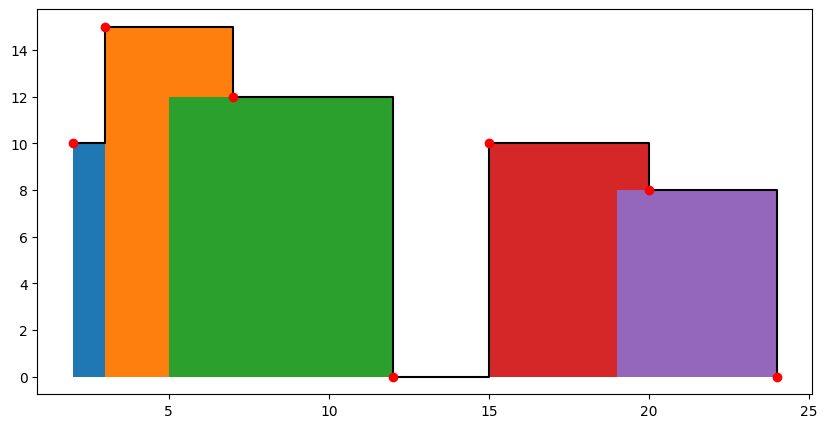

In [5]:
# @title Algorithme Naïf
def skyline_bruteforce(buildings):
    skyline = []
    last_height = 0
    sorted(buildings, key= lambda building: building[0])

    for x in range(26):
      height = 0

      for building in buildings:
        if building[0] <= x <= building[1]:
          height = max(height, building[2])

      if height != last_height:
        if last_height > height:
          skyline.append((x-1, height))
        else:
          skyline.append((x, height))
        last_height = height

    return skyline


verification_plot(example_buildings, skyline_bruteforce(example_buildings))

<u>**Question 1.b):**</u> Quelle est la complexité asymptotique théorique de cet algorithme?

$n$ : nombre de bâtiments

$x_m$ : largeur horizontal du plan

La complexité asymptotique est $θ(n * x_m)$, puisque nous avons une boucle de $nb$ itérations imbriquée dans une autre boucle de $x_m$ itération.

### Mesures

In [6]:
# TODO: Utilisez un de vos matricules comme graine et une liste de tailles judicieusement choisies
dataset = get_dataset(123456789, [100, 200, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000, 50000, 100000, 500000, 1000000])

In [8]:
measures_bruteforce = measure_procedure(skyline_bruteforce, dataset)

Représentez vos mesures sous forme d'un tableau avec la fonction `display_measures_table`.

In [9]:
display_measures_table(measures_bruteforce)

Taille       Temps moyen (s)
100          0.00017681121826171876
200          0.0002933979034423828
500          0.0004675865173339844
1000         0.000939321517944336
1500         0.0013365745544433594
2000         0.0017449378967285157
2500         0.002161598205566406
3000         0.002740764617919922
5000         0.004449892044067383
7500         0.007688379287719727
10000        0.009715557098388672
50000        0.04809026718139649
100000       0.09518933296203613
500000       0.49795804023742674
1000000      1.0895888328552246


### Analyse hybride

#### Test de puissance

<u>**Question 2.a):**</u> Effectuez le test de puissance de votre algorithme.

Pour cela complétez d'abord le code de la fonction `values_test_puissance` pour obtenir les valeurs à placer sur le graphe. Utilisez ensuite la fonction `display_test_puissance` pour afficher le graphe.

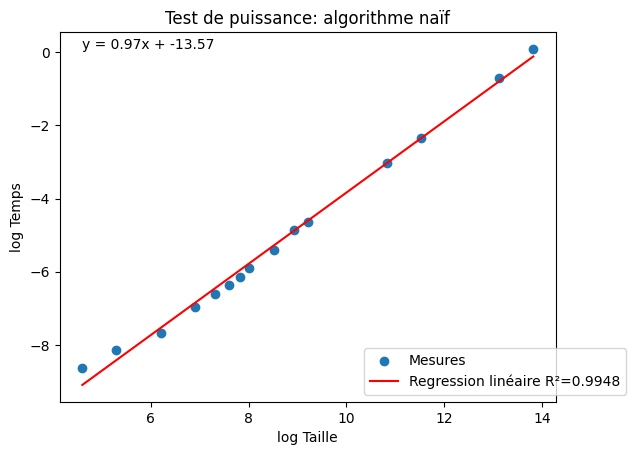

In [10]:
import math

def values_test_puissance(measures):
    return {
        # TODO: calculez les valeurs x:y pour le test de puissance
        # math.log(size, 10) : math.log(measure, 10)
        math.log(size) : math.log(measure)
        for size, measure in measures.items()
    }

display_test_puissance(values_test_puissance(measures_bruteforce), "Test de puissance: algorithme naïf")


<u>**Question 2.b):**</u> Analysez le graphe obtenu pour le test de puissance.

#### Test du rapport

<u>**Question 3.a):**</u> Effectuez le test du rapport avec une ou plusieurs fonctions f pertinentes.

Complétez d'abord la fonction `values_test_rapport` permettant d'obtenir les valeurs à reporter sur le graphe. Puis utilisez la fonction `display_test_rapport` pour afficher le graphe.

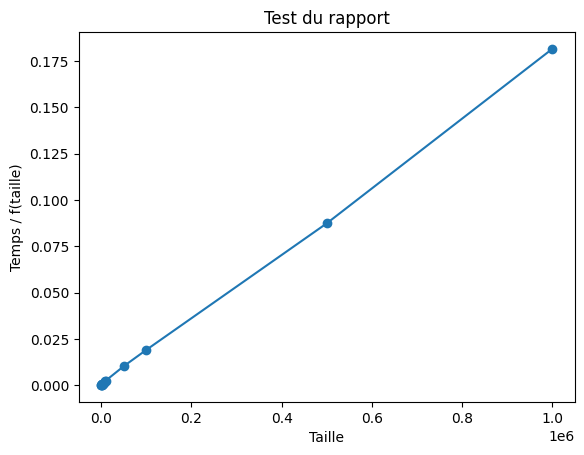

In [11]:
def values_test_rapport(measures, f):
    return {
        # TODO: calculez les valeurs x:y pour le test du rapport
        size : measure/f(size)
        for size, measure in measures.items()
    }

# TODO: definissez f judicieusement
def f(x):
    return math.log(x, 10)

display_test_rapport(values_test_rapport(measures_bruteforce, f))

<u>**Question 3.b):**</u> Analysez le graphe obtenu pour le test du rapport. Précisez le critère de choix de votre ou vos fonctions.

### Test des constantes

<u>**Question 4.a):**</u> Effectuez le test des constantes avec une ou plusieurs fonctions f pertinentes.

Complétez d'abord la fonction `values_test_constantes` permettant d'obtenir les valeurs à reporter sur le graphe. Puis utilisez la fonction `display_test_constantes` pour afficher le graphe.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


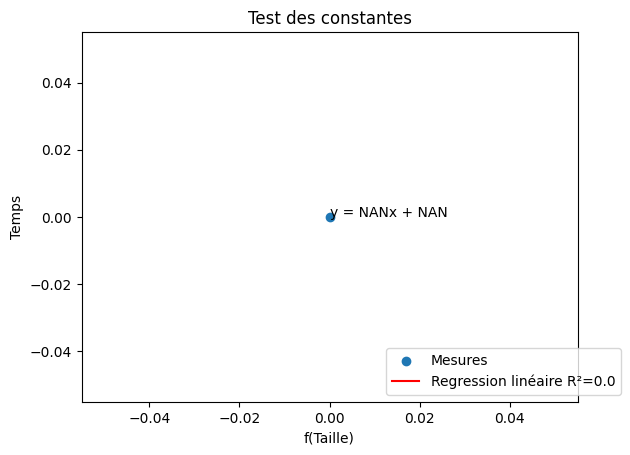

In [12]:
def values_test_constantes(measures, f):
    return {
        # TODO: calculez les valeurs x:y pour le test du rapport
        0 : 0
        for size, measure in measures.items()
    }

# TODO: définissez f judicieusement
def f(x):
    return 0

display_test_constantes(values_test_constantes(measures_bruteforce, f))

<u>**Question 4.b):**</u> Analysez le graphe obtenu et indiquez les valeurs des constantes mises en évidence par le test.


## Partie 2 : Algorithme diviser pour régner (5 pts)


<u>**Question 1.a):**</u> Implantez un algorithme pour le problème de la ligne d'horizon utlisant le patron de conception "Diviser pour régner".

Utilisez la fonction `verification_plot` sur l'exemplaire de présentation du problème `example_buildings` pour vérifier l'exactitude de votre algorithme et laissez la figure dans votre rapport.

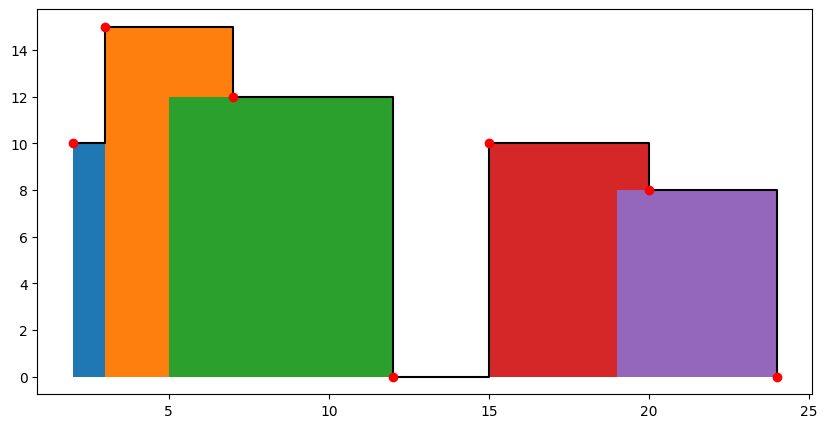

In [13]:
# @title Diviser pour régner
def skyline_divide_and_conquer(buildings):
  #Initialisation des variables
  skyline = []
  output = []
  i,j = 0, 0
  skyline_hauteur_A, skyline_hauteur_B = 0, 0
  sorted(buildings, key= lambda building: building[0])

  if len(buildings) == 1:
    gauche, droite, hauteur = buildings[0]
    return [(gauche, hauteur), (droite, 0)]

  # Récursion
  trunc = len(buildings)//2
  skyline_a = skyline_divide_and_conquer(buildings[:trunc])
  skyline_b = skyline_divide_and_conquer(buildings[trunc:])

  while i < len(skyline_a) and j < len(skyline_b):
    x_a, h_a = skyline_a[i]
    x_b, h_b = skyline_b[j]

    if x_a <= x_b:
      skyline_hauteur_A = h_a
      x = x_a
      i += 1
    elif x_a >= x_b:
      skyline_hauteur_B = h_b
      x = x_b
      j += 1

    skyline.append((x, max(skyline_hauteur_A, skyline_hauteur_B)))

  skyline += skyline_a[i:] + skyline_b[j:]

  last_h = 0
  for (x,h) in skyline:
    if h != last_h:
      output.append((x,h))
      last_h = h

  return output

verification_plot(example_buildings, skyline_divide_and_conquer(example_buildings))

<u>**Question 1.b):**</u> Quelle est la complexité asymptotique théorique de cet algorithme?

Nous pouvons trouver la complexité asymtptotique de cet algorithme grâche au Master Theroem:

$T(n) = l * T(n/b) + c * n^k$

où $n$ est la taille du problème (nombre de bâtiments), $l$ est le nombre de sous-problème dans la récursion, b est le facteur de division de la taille du sous-problème.


Dans nôtre cas, puisqu'on divise le groupe de bâtiments de deux sous-groupes de $n/2$ bâtiments, alors $b = 2$. De plus, nous faisons deux appels récursifs, donc $l = 2$.

Les paramètres du deuxième terme du Master Theroem sont déterminés par la complexité de l'exécution de la fonction sans la récursivité. Nous avons une boucle qui exécute $n$ fois du code de complexité $θ(1)$. Puisque le reste de la fonction a une complexité de $θ(n)$, les paramètres $c$ et $k$ valent $1$.

Donc, $T(n) =  * T(n/2) + n^1$

Puisque
   $l = b^k
⇒ 2 = 2^1
⇒ 2 = 2$

Alors $T(n) ∈ θ(n^k * log(n))$.

### Mesures (seuil 1)

In [14]:
# TODO: Utilisez un de vos matricules comme graine et une liste de tailles judicieusement choisies
dataset = get_dataset(123456789, [100, 200, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000, 50000, 100000, 500000, 1000000])

In [15]:
measures_divide_naive_threshold = measure_procedure(skyline_divide_and_conquer, dataset)

In [16]:
display_measures_table(measures_divide_naive_threshold)

Taille       Temps moyen (s)
100          0.0007833480834960937
200          0.0009903907775878906
500          0.003955650329589844
1000         0.00518956184387207
1500         0.007959127426147461
2000         0.01081709861755371
2500         0.014635944366455078
3000         0.01691727638244629
5000         0.030419301986694337
7500         0.04845733642578125
10000        0.06953668594360352
50000        0.3755324363708496
100000       0.8937524795532227
500000       4.836042833328247
1000000      10.28176302909851


### Analyse hybride

#### Test de puissance

Effectuez le test de puissance de votre algorithme.

Utilisez la fonction `display_test_puissance` pour afficher le graphe.

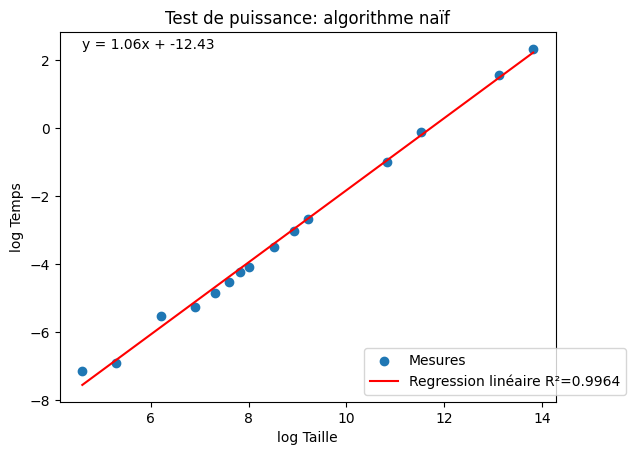

In [17]:
display_test_puissance(values_test_puissance(measures_divide_naive_threshold), "Test de puissance: algorithme naïf")

<u>**Question 2):**</u> Analysez le graphe obtenu pour le test de puissance.

#### Test du rapport

<u>**Question 3.a):**</u> Effectuez le test du rapport avec une ou plusieurs fonctions f pertinentes.

Utilisez la fonction `display_test_rapport` pour afficher le graphe.

In [ ]:
# TODO: définissez f judicieusement
def f(x):
    return 0

display_test_rapport(values_test_rapport(measures_divide_naive_threshold, f))

<u>**Question 3.b):**</u> Analysez le graphe obtenu pour le test du rapport.

### Test des constantes

<u>**Question 4.a):**</u> Effectuez le test des constantes avec une ou plusieurs fonctions f pertinentes.

Utilisez la fonction `display_test_constantes` pour afficher le graphe.

In [ ]:
# TODO: définissez f judicieusement
def f(x):
    return 0

display_test_constantes(values_test_constantes(measures_divide_naive_threshold, f))

<u>**Question 4.b):**</u> Analysez le graphe obtenu et indiquez les valeurs des constantes mises en évidence par le test.

## Partie 3 : Algorithme diviser pour régner (seuil arbitraire) (5 pts)

### Selection du seuil

<u>**Question 1.a):**</u> Modifiez l'algorithme précédent pour y ajouter un seuil de récursivité (e.g. `threshold`). En dessous de ce seuil, vous utiliserez l'algorithme naïf écrit précédemment.

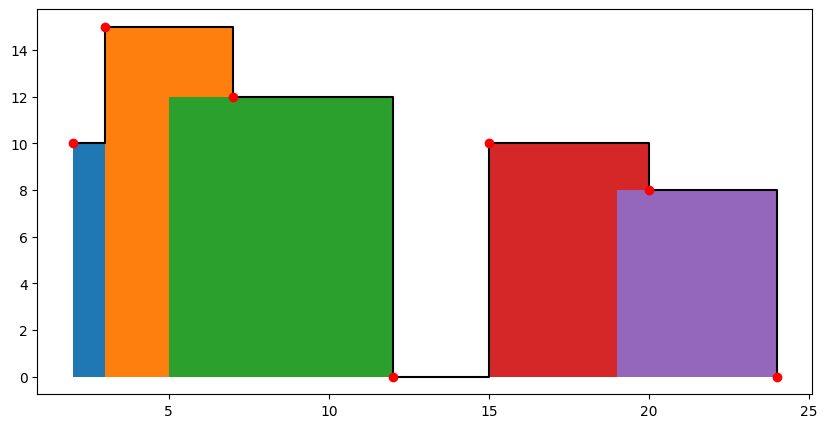

In [18]:
def skyline_divide_and_conquer_threshold(buildings, threshold=1):
    #Initialisation des variables
    skyline = []
    output = []
    i,j = 0, 0
    skyline_hauteur_A, skyline_hauteur_B = 0, 0
    sorted(buildings, key= lambda building: building[0])

    if len(buildings) <= threshold:
      return skyline_bruteforce(buildings)

    # Récursion
    trunc = len(buildings)//2
    skyline_a = skyline_divide_and_conquer(buildings[:trunc])
    skyline_b = skyline_divide_and_conquer(buildings[trunc:])

    while i < len(skyline_a) and j < len(skyline_b):
      x_a, h_a = skyline_a[i]
      x_b, h_b = skyline_b[j]

      if x_a <= x_b:
        skyline_hauteur_A = h_a
        x = x_a
        i += 1
      elif x_a >= x_b:
        skyline_hauteur_B = h_b
        x = x_b
        j += 1

      skyline.append((x, max(skyline_hauteur_A, skyline_hauteur_B)))

    skyline += skyline_a[i:] + skyline_b[j:]

    last_h = 0
    for (x,h) in skyline:
      if h != last_h:
        output.append((x,h))
        last_h = h

    return output

verification_plot(example_buildings, skyline_divide_and_conquer_threshold(example_buildings))

<u>**Question 1.b):**</u> Effectuez les mesures avec plusieurs seuils de récursivité pour déterminer le seuil le plus judicieux.

In [36]:
measures_threshold = {
    i:
    measure_mean_time(
        lambda sample: skyline_divide_and_conquer_threshold(sample, i),
        [list(dataset.values())[0][0]]) # TODO: sélectionnez un exemplaire
        for i in range(2,30) # TODO: testez une liste judicieuse de seuils
}


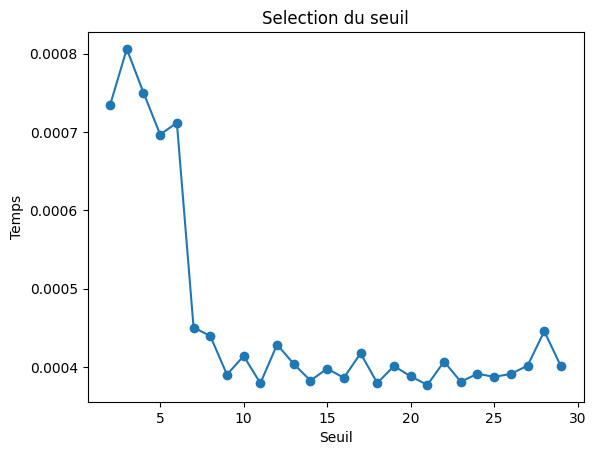

In [37]:
display_mesures_seuil(measures_threshold)

<u>**Question 1.c):**</u> Quel est le seuil de récursivité de le plus judicieux ? Sur quel critère l'avez vous sélectionné ? Pourquoi des seuils inférieurs ou supérieurs donnent-ils de moins bonnes performances ?

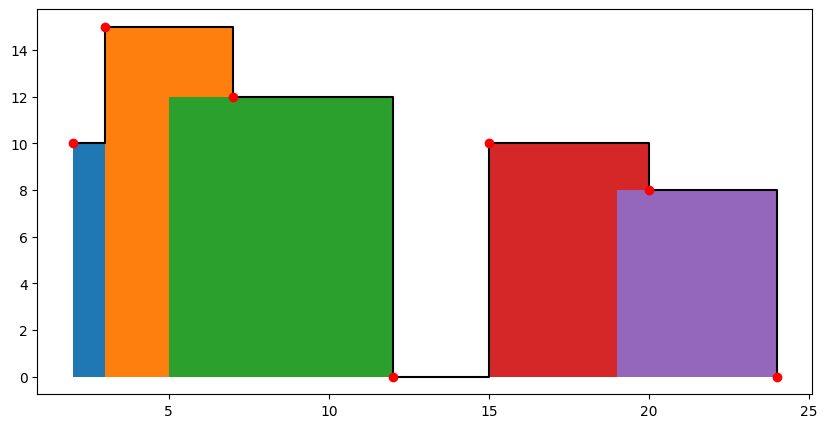

In [38]:
best_threshold = 9
verification_plot(example_buildings, skyline_divide_and_conquer_threshold(example_buildings, best_threshold))

<u>**Question 1.d):**</u> Quelle est la complexité asymptotique théorique de cet algorithme?

Si $n < 9$, la complexité est de $θ(n*x_m)$, sinon la complexité sera de $θ(n^k * log(n))$.



### Mesures (seuil n)

In [39]:
measures_divide_best_threshold = measure_procedure(lambda sample : skyline_divide_and_conquer_threshold(sample, best_threshold), dataset)

In [40]:
display_measures_table(measures_divide_best_threshold)

Taille       Temps moyen (s)
100          0.0007039070129394531
200          0.0010789394378662109
500          0.0025290966033935545
1000         0.0072475910186767575
1500         0.008475542068481445
2000         0.011832141876220703
2500         0.015332555770874024
3000         0.020026969909667968
5000         0.03410029411315918
7500         0.048775863647460935
10000        0.06326413154602051
50000        0.3796515941619873
100000       0.9199634552001953
500000       5.0077801704406735
1000000      10.566560792922974


### Analyse hybride

#### Test de puissance

Effectuez le test de puissance de votre algorithme.

Utilisez la fonction `display_test_puissance` pour afficher le graphe.

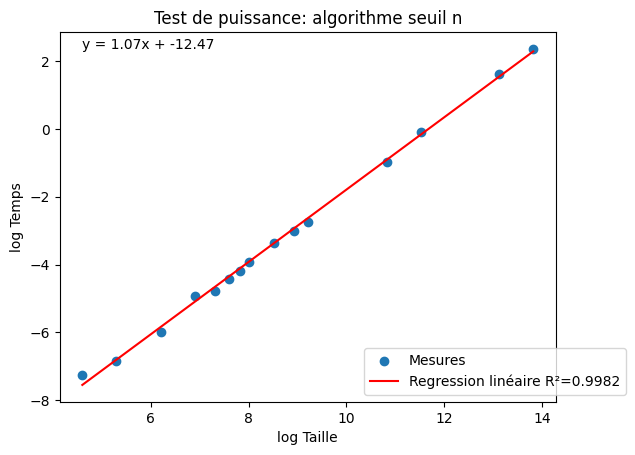

In [41]:
display_test_puissance(values_test_puissance(measures_divide_best_threshold), "Test de puissance: algorithme seuil n")

<u>**Question 2):**</u> Analysez le graphe obtenu pour le test de puissance.

#### Test du rapport

<u>**Question 3.a):**</u> Effectuez le test du rapport avec une ou plusieurs fonctions f pertinentes.

Utilisez la fonction `display_test_rapport` pour afficher le graphe.

In [ ]:
# TODO: définissez f judicieusement
def f(x):
    return 0

display_test_rapport(values_test_rapport(measures_divide_best_threshold, f))

<u>**Question 3.b):**</u> Analysez le graphe obtenu pour le test du rapport.

### Test des constantes

<u>**Question 4.a):**</u> Effectuez le test des constantes avec une ou plusieurs fonctions f pertinentes.

Utilisez la fonction `display_test_constantes` pour afficher le graphe.

In [ ]:
# TODO: définissez f judicieusement
def f(x):
    return 0

display_test_constantes(values_test_constantes(measures_divide_best_threshold, f))


<u>**Question 4.b):**</u> Analysez le graphe obtenu et indiquez les valeurs des constantes mises en évidence par le test.

<u>**Question 5):**</u> Commentez l'impact du seuil de récursivité. Que représente t'il pour l'algorithme diviser pour régner et l'algorithme naïf ?

# Conclusion (3 pts)

Résumez *brièvement* vos découvertes et analyses, et indiquez dans quelles circonstances vous utiliserez chacun de ces 3 algorithmes.

 ## Autres critères (2 pts)
 Qualité du code / 1 pt

Présentation générale / 1 pt

- Concision
- Qualité du français

Pénalité retard
- -1 pt / journée de retard, arrondi vers le haut. Les TPs ne sont plus acceptés après 3 jours.